In [71]:
import pandas as pd
import numpy as np
import re
import os
import datetime
from collections import defaultdict
from pathlib import Path
from difflib import SequenceMatcher
import matplotlib.pyplot as plt

In [26]:
info = pd.read_csv('../data/unique_messages.csv', index_col=0)
results = pd.read_csv('../data/unique_messages_goemotion_predictions.csv', index_col=0)

In [31]:
column = pd.DataFrame({'role': info['ParticipantRole']})

In [32]:
column = column.reset_index(drop= True)

In [35]:
final = column.join(results)

In [39]:
buyer = final[final['role'] == 'Visitor']

In [41]:
volunteer = final[final['role'] == 'Agent']

In [47]:
buyer = buyer.drop(columns = ['role'])

In [43]:
def set_frequency(row) -> int:
    if row > 0:
        return 1
    else:
        return 0

In [50]:
frequencies_volunteer = []
for column in volunteer.columns:
    frequencies_volunteer.append(sum(volunteer[column].apply(lambda x: set_frequency(x))))

In [49]:
frequencies_buyer = []
for column in buyer.columns:
    frequencies_buyer.append(sum(buyer[column].apply(lambda x: set_frequency(x))))

In [82]:
freq_dict_buy = dict(zip(buyer.columns, frequencies_buyer))
sorted_freq_dict_buy = dict(sorted(freq_dict_vol.items(), key=lambda item: item[1]))

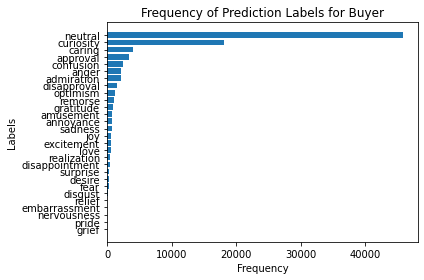

In [83]:
plt.barh(list(sorted_freq_dict_buy.keys()), list(sorted_freq_dict_buy.values()))
plt.title('Frequency of Prediction Labels for Buyer')
plt.xlabel('Frequency')
plt.ylabel('Labels')
plt.tight_layout()
plt.savefig('freq_preds.jpg')

In [77]:
freq_dict_vol = dict(zip(volunteer.columns, frequencies_volunteer))
sorted_freq_dict_vol = dict(sorted(freq_dict_vol.items(), key=lambda item: item[1]))

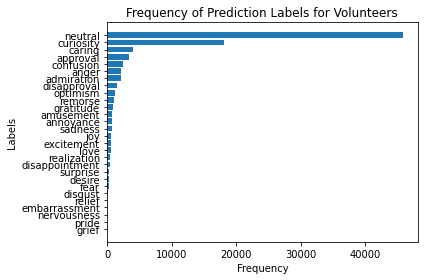

In [78]:
plt.barh(list(sorted_freq_dict_vol.keys()), list(sorted_freq_dict_vol.values()))
plt.title('Frequency of Prediction Labels for Volunteers')
plt.xlabel('Frequency')
plt.ylabel('Labels')
plt.tight_layout()
plt.savefig('freq_preds.jpg')

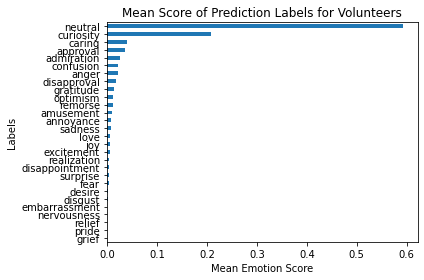

In [103]:
volunteer.mean().sort_values(ascending=True).plot.barh()
plt.title('Mean Score of Prediction Labels for Volunteers')
plt.xlabel('Mean Emotion Score')
plt.ylabel('Labels')
plt.tight_layout()
#plt.savefig('mean_preds.jpg')

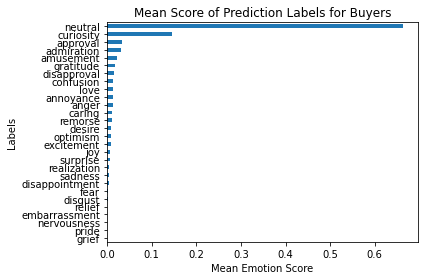

In [105]:
buyer.mean().sort_values(ascending=True).plot.barh()
plt.title('Mean Score of Prediction Labels for Buyers')
plt.xlabel('Mean Emotion Score')
plt.ylabel('Labels')
plt.tight_layout()
#plt.savefig('mean_preds.jpg')